results/mnist_opti_fc/N500_K1_lr0.100_bs64_epo20_mu1.0000_seed1_Wseed3_iiddirichlet_alpha0.500
results/mnist_opti_fc/N500_K2_lr0.100_bs64_epo20_mu1.0000_seed1_Wseed3_iiddirichlet_alpha0.500
results/mnist_opti_fc/N500_K5_lr0.100_bs64_epo20_mu1.0000_seed1_Wseed3_iiddirichlet_alpha0.500
results/mnist_opti_fc/N500_K10_lr0.100_bs64_epo20_mu1.0000_seed1_Wseed3_iiddirichlet_alpha0.500
results/mnist_opti_fc/N500_K20_lr0.100_bs64_epo20_mu1.0000_seed1_Wseed3_iiddirichlet_alpha0.500
results/mnist_opti_fc/N500_K30_lr0.100_bs64_epo20_mu1.0000_seed1_Wseed3_iiddirichlet_alpha0.500
results/mnist_Sal_WR_fc/N500_K1_lr0.100_bs64_epo20_mu1.0000_seed1_Wseed3_iiddirichlet_alpha0.500
results/mnist_Sal_WR_fc/N500_K2_lr0.100_bs64_epo20_mu1.0000_seed1_Wseed3_iiddirichlet_alpha0.500
results/mnist_Sal_WR_fc/N500_K5_lr0.100_bs64_epo20_mu1.0000_seed1_Wseed3_iiddirichlet_alpha0.500
results/mnist_Sal_WR_fc/N500_K10_lr0.100_bs64_epo20_mu1.0000_seed1_Wseed3_iiddirichlet_alpha0.500
results/mnist_Sal_WR_fc/N500_K20_lr0.1

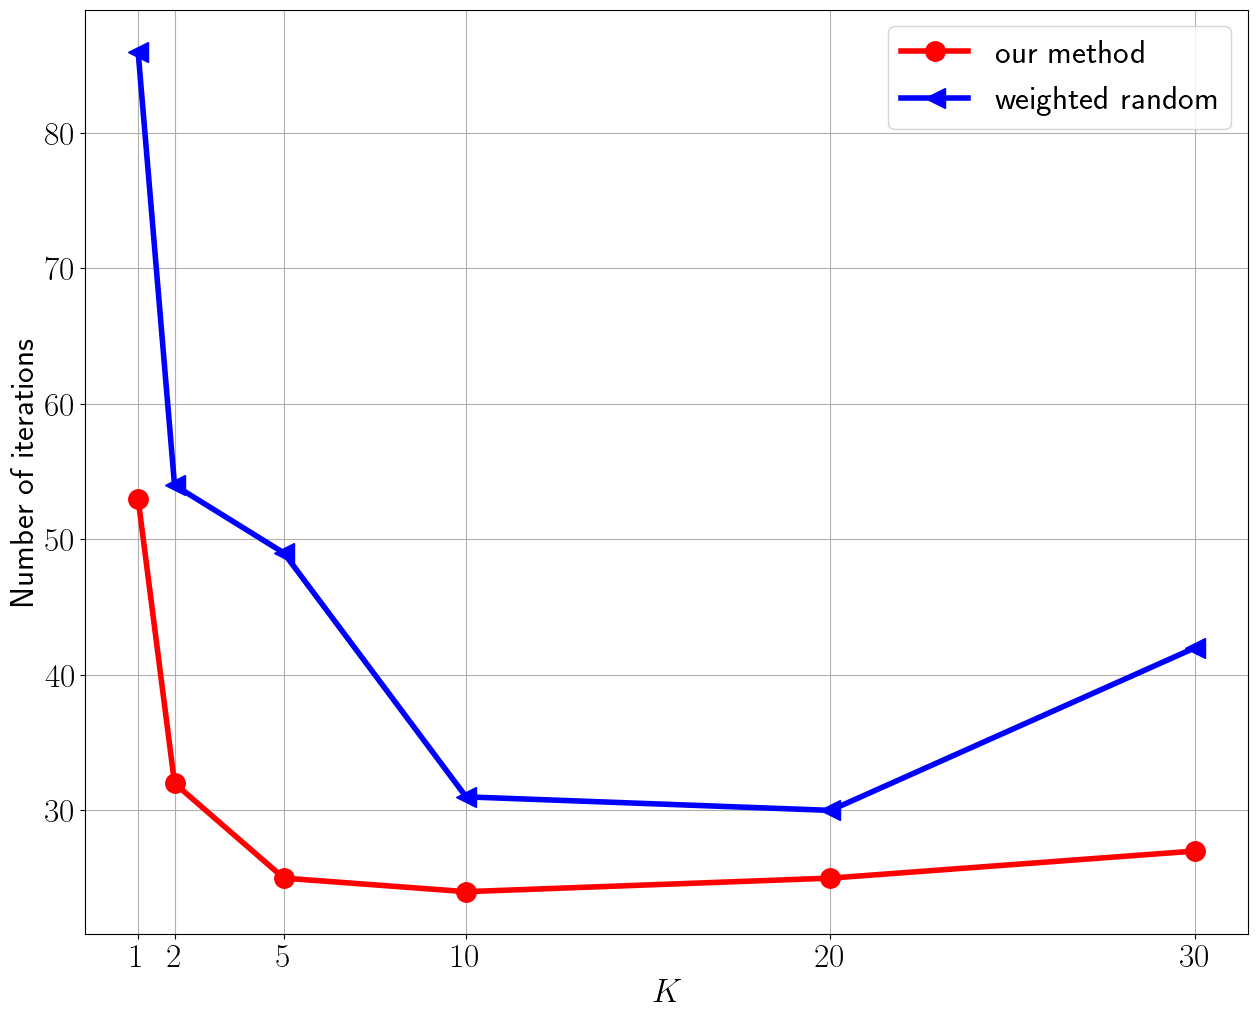

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 11 13:15:41 2021

@author: Paul Zheng
"""

import numpy as np
import pandas as pd
from numpy import loadtxt
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Serif"]})
font_size = 24
marker_size = 6

args = {'opt': "Prox", #"Avg" "Prox"
        'iid': "dirichlet", #"dirichlet" "niid"
        'dataset': 'mnist', #cifar, mnist, synthetic
        'method': "BL", #"BL" "UR", "opti", "WR", "Sal_WR"
        'ep':20,
        'seed_ind': 0,
        'K':10
        }

def give_filename(args):
    # niidCapital = args['iid'].capitalize()

    # folder_name = "results/simu2_{}_{}{}".format(args['method'],args['opt'],args['iid'] )#'niid')
    # folder_name = "results/{}_{}_R800".format(args['dataset'],args['method'] )#'niid')
    folder_name = "results/{}_{}_fc".format(args['dataset'],args['method'] )#'niid')
    tag = '{}/N{}_K{}_lr{:.3f}_bs{:d}_epo{:d}_mu{:.4f}_seed{}_Wseed{}_iid{}_alpha{:.3f}'
    seed_ind = 0
    if args['dataset'] == 'mnist':
        saveFileName = tag.format(folder_name, 500, args['K'] ,
                              0.1 , 64 , args['ep'] ,
                              1.0, 1 + args['seed_ind'] , 3 -args['seed_ind'] ,
                              args['iid'] , 0.5)
    elif args['dataset'] == 'cifar':
        saveFileName = tag.format(folder_name, 100, args['K'],
                              0.1 , 64 , args['ep'] ,
                              1.0,1+ args['seed_ind'], 3- args['seed_ind'] ,
                              'dirichlet' , 0.5)
    else: # synthetic cases
        saveFileName = tag.format(folder_name, 30, args['K'] ,
                              0.1 , 64 , args['ep'] ,
                              1.0,1 + args['seed_ind'], 3-args['seed_ind'] ,
                              'iid' , 0.5)
    acc = saveFileName+'_accuracy.csv'
    failed = saveFileName+'_failed.csv'
    loss = saveFileName+'_loss.csv'
    return saveFileName

def give_data(args):
    pre_file_name = give_filename(args)
    print(pre_file_name)
    acc_file = pre_file_name+'_accuracy.csv'
    failed_file = pre_file_name+'_failed_list.csv'
    loss_file = pre_file_name+'_loss.csv'
    acc = loadtxt(acc_file, delimiter= ',')
    # fails = loadtxt(failed_file, delimiter= ',')
    # loss = loadtxt(loss_file, delimiter= ',')
    return acc
def give_full_method_name(abb):
    if abb == "optil":
        return "our method loss"
    if abb == "optils":
        return "our method loss and size"
    if abb == "opti":
        return "our method"
    if abb == "BL":
        return "best loss"
    if abb == "uni":
        return "uniform"
    if abb == "Sal_WR":
        return "weighted random"
    if abb == "WR":
        return "weighted random w/o aggregation correction"
    if abb == "BC":
        return "best channel"
    if abb == "Salehi":
        return "Sal"
def detect_iter_accuracy(acc, thr, window_size):
    acc_pd= pd.Series(acc)
    acc_smooth = acc_pd.rolling(window_size).mean()
    acc_std = acc_pd.rolling(window_size).std()
    bool_wanted = (acc_smooth - acc_std > thr)
    ind_wanted = np.where(bool_wanted)[0]
    # print(ind_wanted)
    if len(ind_wanted) == 0:
        return 1000
    return ind_wanted[0]
    

#%% Comparison client selection
# f = plt.figure(figsize=[20,20])
fig = plt.figure(figsize=[15,12])
ax = fig.add_subplot(111)
# fig, ax = plt.subplots(figsize=[15,12])
colors = ['r', 'b', 'g', 'c','m','y']
markers = ['o', '<','x','2','+','D']
id_color = 0
# font_size = 34
if args['iid'] == 'dirichlet':
    window_size = 21 # 51, 81
    nb_ite_div100= 5
    loweracc=6
else:
    window_size = 61
    nb_ite_div100= 8
    loweracc=2
Kvec = [1,2,5,10,20,30]
# res_K = np.zeros((len(Kvec),2))
# for idm, meth in enumerate(["Salehi"]):
for idm, meth in enumerate(["opti","Sal_WR"]):#
    args['method'] = meth
    res_K = np.ones(len(Kvec))*1000
    for idK, K in enumerate(Kvec):
        args['K'] = K
        try:
            acc = give_data(args)
        except:
            print('data not available for K={} and {}'.format(K, meth))
            continue
        lala = detect_iter_accuracy(acc, 80, window_size)
        if lala is None or lala ==1000:
            print('accuracy not attained for K={} and {}'.format(K, meth))
            res_K[idK] = 1000
            continue
        res_K[idK] = lala
        # comm_rounds = np.arange(1,len(acc)+1)
        # acc_pd= pd.Series(acc)
        # acc_smooth = acc_pd.rolling(window_size).mean()
        # acc_std = acc_pd.rolling(window_size).std()
        # # acc_smooth = savgol_filter(vec_avg_dict[key], 21, 3)
        # plt.plot(comm_rounds,np.asarray(acc_smooth), linewidth = 4.0,
        #          marker = markers[id_color],markevery=20, markersize = 12,
        #          label=give_full_label_name(K,meth), color = colors[id_color])
        # indvec = np.arange(5*id_color,len(acc), step=160)
        # ax.errorbar(np.arange(1,len(acc_pd)+1)[indvec],
        #             np.asarray(acc_smooth)[indvec], 
        #             yerr = np.asarray(acc_std)[indvec],
        #             color = colors[id_color],
        #             fmt='o', capsize=8,linewidth = 4)
    plt.plot(Kvec, res_K, linewidth = 4.0, markersize = 14,
             marker = markers[id_color], color = colors[id_color],label =  give_full_method_name(meth))
    id_color += 1
# plt.plot(Kvec, res_K[:,0], label= "our method", linewidth = 4.0, markersize = 14, marker = 'o')
# plt.plot(Kvec, res_K[:,1], label= "uniform", linewidth = 4.0, markersize = 24, marker = '+')
plt.xlabel("$K$",fontsize=font_size)
plt.ylabel("Number of iterations",fontsize=font_size)
plt.legend(loc=0,prop={'size': font_size})
plt.grid()
plt.xticks(Kvec, fontsize= font_size)
plt.yticks(fontsize= font_size)
# plt.xticks(np.arange(nb_ite_div100+1)*100, fontsize = font_size)
# plt.yticks(np.arange(loweracc,10)*10, fontsize = font_size)
# plt.title("Fed"+args['opt'] + " "+args['iid']+" alpha = 0.5", fontsize =font_size)
# plt.title(args['iid'], fontsize =font_size)

# ax.tick_params(color='#dddddd')
# ax.spines['bottom'].set_color('#dddddd')
# ax.spines['top'].set_color('#dddddd') 
# ax.spines['right'].set_color('#dddddd')
# ax.spines['left'].set_color('#dddddd')
# plt.tight_layout()
figure_folder = "D:/Documents/Sciebo_groupfiles/PhD_Paul/figures/"
# figure_folder = "D:/sciebo/files/PhD_Paul/figures/"
# plt.savefig(figure_folder+"comp_K_"+args['iid']+".pdf")
plt.show()

# Plot several cell sizes

results/mnist_opti_R600/N500_K1_lr0.100_bs64_epo20_mu1.0000_seed1_Wseed3_iiddirichlet_alpha0.500
results/mnist_opti_R600/N500_K2_lr0.100_bs64_epo20_mu1.0000_seed1_Wseed3_iiddirichlet_alpha0.500
results/mnist_opti_R600/N500_K5_lr0.100_bs64_epo20_mu1.0000_seed1_Wseed3_iiddirichlet_alpha0.500
results/mnist_opti_R600/N500_K10_lr0.100_bs64_epo20_mu1.0000_seed1_Wseed3_iiddirichlet_alpha0.500
results/mnist_opti_R600/N500_K20_lr0.100_bs64_epo20_mu1.0000_seed1_Wseed3_iiddirichlet_alpha0.500
results/mnist_opti_R600/N500_K30_lr0.100_bs64_epo20_mu1.0000_seed1_Wseed3_iiddirichlet_alpha0.500
results/mnist_Sal_WR_R600/N500_K1_lr0.100_bs64_epo20_mu1.0000_seed1_Wseed3_iiddirichlet_alpha0.500
results/mnist_Sal_WR_R600/N500_K2_lr0.100_bs64_epo20_mu1.0000_seed1_Wseed3_iiddirichlet_alpha0.500
results/mnist_Sal_WR_R600/N500_K5_lr0.100_bs64_epo20_mu1.0000_seed1_Wseed3_iiddirichlet_alpha0.500
results/mnist_Sal_WR_R600/N500_K10_lr0.100_bs64_epo20_mu1.0000_seed1_Wseed3_iiddirichlet_alpha0.500
results/mnist_Sal_

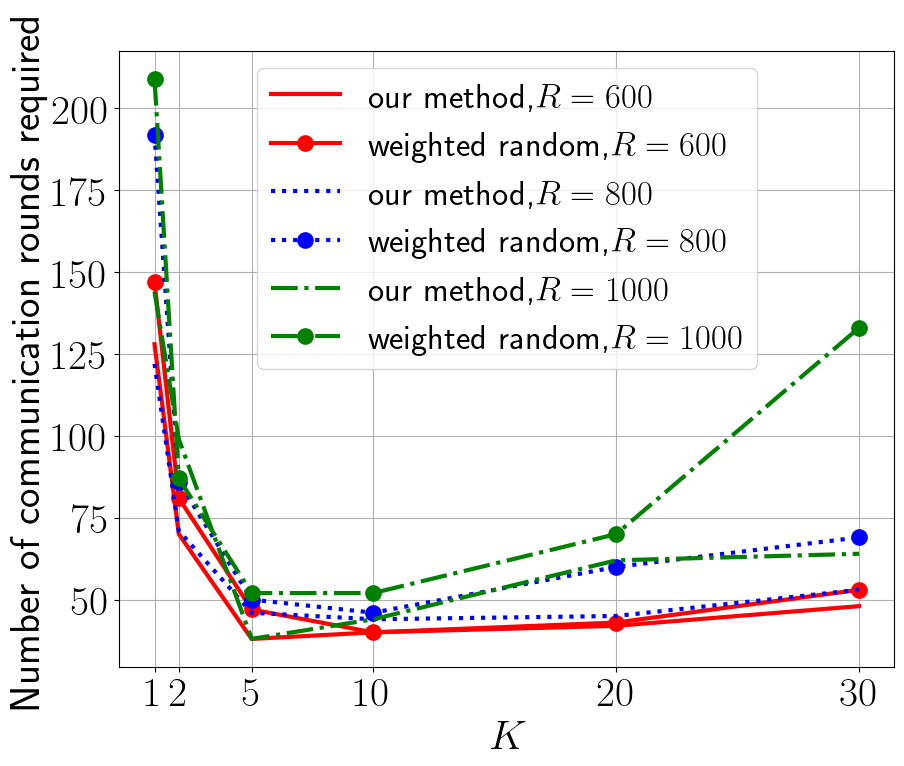

In [15]:
import numpy as np
import pandas as pd
from numpy import loadtxt
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Serif"]})
font_size = 30
marker_size = 10
accuracy_attained = 90


args = {'opt': "Prox", #"Avg" "Prox"
        'iid': "dirichlet", #"dirichlet" "niid"
        'dataset': 'mnist', #cifar, mnist, synthetic
        'method': "BL", #"BL" "UR", "opti", "WR", "Sal_WR"
        'ep':20,
        'seed_ind': 0,
        'K':10,
        'R':1000 # 600, 800, 1000
        }
def give_filename(args):
    # niidCapital = args['iid'].capitalize()

    # folder_name = "results/simu2_{}_{}{}".format(args['method'],args['opt'],args['iid'] )#'niid')
    # folder_name = "results/{}_{}_R800".format(args['dataset'],args['method'] )#'niid')
    if args['R'] == 1000:
        folder_name = "results/{}_{}_fc".format(args['dataset'],args['method'] )#'niid')
        # folder_name = "results/{}_{}".format(args['dataset'],args['method'] )#'niid')
    elif args['R'] == 600:
        folder_name = "results/{}_{}_R600".format(args['dataset'],args['method'] )#'niid')
    elif args['R'] == 800:
        folder_name = "results/{}_{}_R800".format(args['dataset'],args['method'] )#'niid')
    else:
        print("R value wrong")
    tag = '{}/N{}_K{}_lr{:.3f}_bs{:d}_epo{:d}_mu{:.4f}_seed{}_Wseed{}_iid{}_alpha{:.3f}'
    seed_ind = 0
    if args['dataset'] == 'mnist':
        saveFileName = tag.format(folder_name, 500, args['K'] ,
                              0.1 , 64 , args['ep'] ,
                              1.0, 1 + args['seed_ind'] , 3 -args['seed_ind'] ,
                              args['iid'] , 0.5)
    elif args['dataset'] == 'cifar':
        saveFileName = tag.format(folder_name, 100, args['K'],
                              0.1 , 64 , args['ep'] ,
                              1.0,1+ args['seed_ind'], 3- args['seed_ind'] ,
                              'dirichlet' , 0.5)
    else: # synthetic cases
        saveFileName = tag.format(folder_name, 30, args['K'] ,
                              0.1 , 64 , args['ep'] ,
                              1.0,1 + args['seed_ind'], 3-args['seed_ind'] ,
                              'iid' , 0.5)
    acc = saveFileName+'_accuracy.csv'
    failed = saveFileName+'_failed.csv'
    loss = saveFileName+'_loss.csv'
    return saveFileName
def give_data(args):
    pre_file_name = give_filename(args)
    print(pre_file_name)
    acc_file = pre_file_name+'_accuracy.csv'
    failed_file = pre_file_name+'_failed_list.csv'
    loss_file = pre_file_name+'_loss.csv'
    acc = loadtxt(acc_file, delimiter= ',')
    # fails = loadtxt(failed_file, delimiter= ',')
    # loss = loadtxt(loss_file, delimiter= ',')
    return acc
def give_full_method_name(abb):
    if abb == "optil":
        return "our method loss"
    if abb == "optils":
        return "our method loss and size"
    if abb == "opti":
        return "our method"
    if abb == "BL":
        return "best loss"
    if abb == "uni":
        return "uniform"
    if abb == "Sal_WR":
        return "weighted random"
    if abb == "WR":
        return "weighted random w/o aggregation correction"
    if abb == "BC":
        return "best channel"
    if abb == "Salehi":
        return "Sal"
def detect_iter_accuracy(acc, thr, window_size):
    acc_pd= pd.Series(acc)
    acc_smooth = acc_pd.rolling(window_size).mean()
    acc_std = acc_pd.rolling(window_size).std()
    # bool_wanted = (acc_smooth - acc_std > thr)
    bool_wanted = (acc_smooth > thr)
    ind_wanted = np.where(bool_wanted)[0]
    # print(ind_wanted)
    if len(ind_wanted) == 0:
        return 1000
    return ind_wanted[0]
    

fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111)
# fig, ax = plt.subplots(figsize=[15,12])
colors = ['r', 'b', 'g', 'c','m','y']
# markers = ['o', '<','x','2','+','D']
markers = ['', 'o']
line_style = ['-', ':', '-.']
id_color = 0
# font_size = 34
if args['iid'] == 'dirichlet':
    window_size = 21 # 51, 81
    nb_ite_div100= 5
    loweracc=6
else:
    window_size = 51
    nb_ite_div100= 8
    loweracc=2
Kvec = [1,2,5,10,20,30]
res_all_opti = np.zeros((len(Kvec),3))
res_all_WR = np.zeros((len(Kvec),3))
# res_K = np.zeros((len(Kvec),2))
# for idm, meth in enumerate(["Salehi"]):
for id_R, cell_radius in enumerate([600,800,1000]):
    args['R']  = cell_radius
    for idm, meth in enumerate(["opti","Sal_WR"]):#
        args['method'] = meth
        res_K = np.ones(len(Kvec))*1000
        for idK, K in enumerate(Kvec):
            args['K'] = K
            try:
                acc = give_data(args)
            except:
                print('data not available for K={}, {}, R= {}'.format(K, meth, cell_radius))
                continue
            lala = detect_iter_accuracy(acc, accuracy_attained, window_size)
            if lala is None or lala ==1000:
                print('accuracy not attained for K={} and {}'.format(K, meth))
                res_K[idK] = 1000
                continue
            res_K[idK] = lala
            # comm_rounds = np.arange(1,len(acc)+1)
            # acc_pd= pd.Series(acc)
            # acc_smooth = acc_pd.rolling(window_size).mean()
            # acc_std = acc_pd.rolling(window_size).std()
            # # acc_smooth = savgol_filter(vec_avg_dict[key], 21, 3)
            # plt.plot(comm_rounds,np.asarray(acc_smooth), linewidth = 4.0,
            #          marker = markers[id_color],markevery=20, markersize = 12,
            #          label=give_full_label_name(K,meth), color = colors[id_color])
            # indvec = np.arange(5*id_color,len(acc), step=160)
            # ax.errorbar(np.arange(1,len(acc_pd)+1)[indvec],
            #             np.asarray(acc_smooth)[indvec], 
            #             yerr = np.asarray(acc_std)[indvec],
            #             color = colors[id_color],
            #             fmt='o', capsize=8,linewidth = 4)
        if idm == 0:
            res_all_opti[:, id_R] = res_K
        else:
            res_all_WR[:, id_R] = res_K
        plt.plot(Kvec, res_K, linewidth = 3, markersize = marker_size, linestyle = line_style[id_R],markeredgewidth = 2,
                 marker = markers[idm], color = colors[id_R],label =  f"{give_full_method_name(meth)},$R={cell_radius}$")
    
# plt.plot(Kvec, res_K[:,0], label= "our method", linewidth = 4.0, markersize = 14, marker = 'o')
# plt.plot(Kvec, res_K[:,1], label= "uniform", linewidth = 4.0, markersize = 24, marker = '+')
plt.xlabel("$K$",fontsize=font_size)
plt.ylabel("Number of communication rounds required",fontsize=font_size)
# plt.legend(loc=0,prop={'size': font_size-5}, bbox_to_anchor=(0.65,0.64))
plt.legend(loc=0,prop={'size': font_size-5})
# plt.legend(loc=(0.2,0.65),prop={'size': font_size-5})
plt.grid()
plt.xticks(Kvec, fontsize= font_size)
plt.yticks(fontsize= font_size)
# plt.xticks(np.arange(nb_ite_div100+1)*100, fontsize = font_size)
# plt.yticks(np.arange(loweracc,10)*10, fontsize = font_size)
# plt.title("Fed"+args['opt'] + " "+args['iid']+" alpha = 0.5", fontsize =font_size)
# plt.title(args['iid'], fontsize =font_size)

# ax.tick_params(color='#dddddd')
# ax.spines['bottom'].set_color('#dddddd')
# ax.spines['top'].set_color('#dddddd') 
# ax.spines['right'].set_color('#dddddd')
# ax.spines['left'].set_color('#dddddd')
# plt.tight_layout()
# figure_folder = "D:/Documents/Sciebo_groupfiles/PhD_Paul/figures/"
# figure_folder = "D:/sciebo/files/PhD_Paul/figures/"
# plt.savefig(figure_folder+"comp_K_"+args['iid']+".pdf")
plt.savefig(f"./figures2/comp_K_acc_{accuracy_attained}_{args['dataset']}_{args['iid']}_2.pdf", bbox_inches="tight")
plt.show()

In [3]:
import pandas as pd

df_opti = pd.DataFrame(res_all_opti, columns = ['R=600', 'R=800','R=1000'], index = Kvec)
df_WR = pd.DataFrame(res_all_WR, columns = ['R=600', 'R=800','R=1000'], index = Kvec)
print(f"{accuracy_attained}_{args['dataset']}_{args['iid']}")
print("opti")
print(df_opti)
print("WR")
print(df_WR)
print("diff")
print(df_WR - df_opti)

res_all = np.zeros((len(Kvec),3,3))
res_all[:,:,0] = res_all_opti
res_all[:,:,1] = res_all_WR
res_all[:,:,2] = res_all_WR - res_all_opti

with open(f"./python_res/comp_K_acc_{accuracy_attained}_{args['dataset']}_{args['iid']}.npy", 'wb') as f:
    np.save(f, res_all)

ModuleNotFoundError: No module named 'pandas'